In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


plt.style.use("ggplot")  #using style ggplot


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re


In [85]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18


In [86]:
data = pd.read_csv('./tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [87]:
# looking the shape DataSet
data.shape

(20491, 2)

In [88]:
#Checking the dtypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [89]:
#checking null value 
data.isna().sum()

Review    0
Rating    0
dtype: int64

In [90]:
# any duplicate data 
data.duplicated().sum()

0

In [91]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [92]:
# Length of word in sentence
data['Length'] = data['Review'].apply(len)
data.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [93]:
# look  describe data set
data["Length"].describe().round(2)

count    20491.0
mean       724.9
std        689.1
min         44.0
25%        339.0
50%        537.0
75%        859.0
max      13501.0
Name: Length, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Length'>

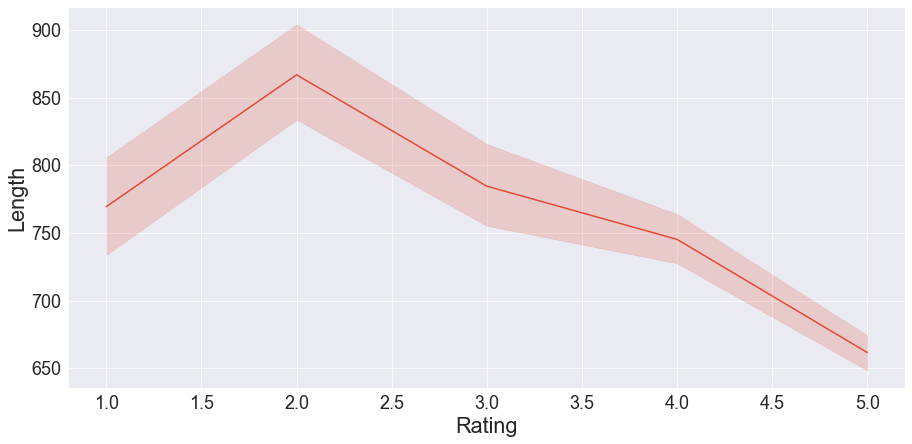

In [94]:
# graph what the the relationship between Rating and Length

plt.figure(figsize=(15,7))
sns.lineplot(data=data,x="Rating", y="Length")

In [115]:
px.scatter(data,x="Rating",y="Length", color="Rating")

In [96]:
# Let assume :
# rating 4, 5 => Positive rating 
# 1, 2, 3 => Negative

def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

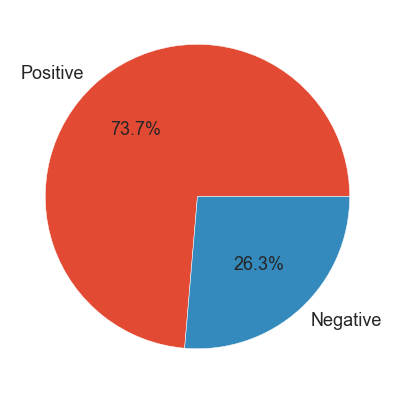

In [97]:
data['Rating'] = data['Rating'].apply(ratings)
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()


In [99]:
data['mean_word_length'] = data['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)


,Review,Rating,Length,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,6.470149
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,6.396040
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,6.011765
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,6.084746
9,excellent stayed hotel monaco past w/e delight...,Positive,271,6.714286


In [100]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [101]:
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

,Review,Rating,Length,mean_word_length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598,87
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571,191
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,6.470149,134
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,6.396040,101
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,6.011765,85
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,6.084746,59
9,excellent stayed hotel monaco past w/e delight...,Positive,271,6.714286,35


In [102]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['Review'][0])])

591.0

In [103]:
data['mean_sent_length'] = data['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,Review,Rating,Length,mean_word_length,Word_count,mean_sent_length
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598,87,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000,250,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429,217,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337,89,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571,191,1279.0
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,6.470149,134,1000.0
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,6.396040,101,746.0
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,6.011765,85,595.0
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,6.084746,59,417.0
9,excellent stayed hotel monaco past w/e delight...,Positive,271,6.714286,35,269.0


In [104]:
def corpus(text):
    text_list = text.split()
    return text_list

In [105]:
data['Review_lists'] =data['Review'].apply(corpus)
data.head(10)

,Review,Rating,Length,mean_word_length,Word_count,mean_sent_length,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598,87,591.0,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000,250,1687.0,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429,217,712.0,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337,89,598.0,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571,191,1279.0,"[great, stay, great, stay,, went, seahawk, gam..."
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,6.470149,134,1000.0,"[love, monaco, staff, husband, stayed, hotel, ..."
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,6.396040,101,746.0,"[cozy, stay, rainy, city,, husband, spent, 7, ..."
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,6.011765,85,595.0,"[excellent, staff,, housekeeping, quality, hot..."
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,6.084746,59,417.0,"[hotel, stayed, hotel, monaco, cruise,, rooms,..."
9,excellent stayed hotel monaco past w/e delight...,Positive,271,6.714286,35,269.0,"[excellent, stayed, hotel, monaco, past, w/e, ..."


In [106]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 75772.70it/s]


2138765

In [107]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [108]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

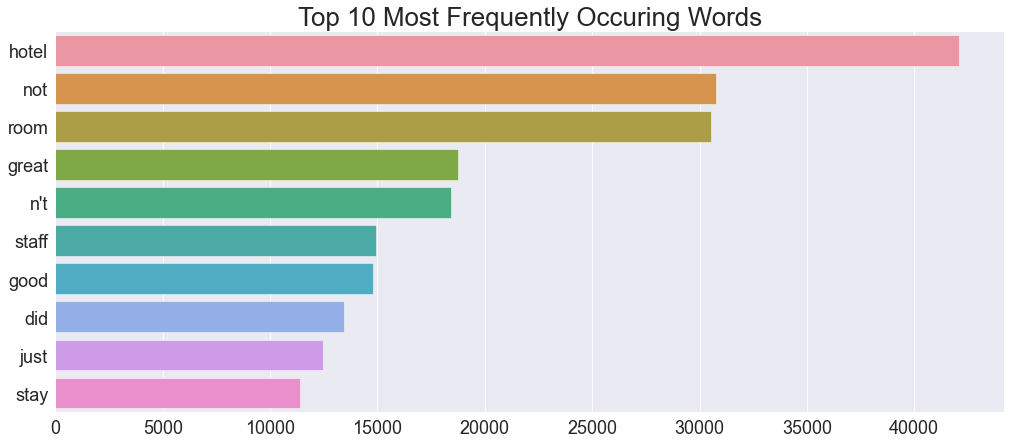

In [109]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()


In [110]:
# Length of word in sentence
data['Length'] = data['Review'].apply(len)
data.head()

,Review,Rating,Length,mean_word_length,Word_count,mean_sent_length,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598,87,591.0,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000,250,1687.0,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429,217,712.0,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337,89,598.0,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571,191,1279.0,"[great, stay, great, stay,, went, seahawk, gam..."


In [111]:
# look  describe data set
data["Length"].describe().round(2)

count    20491.0
mean       724.9
std        689.1
min         44.0
25%        339.0
50%        537.0
75%        859.0
max      13501.0
Name: Length, dtype: float64